#PCA / ICA


In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.io import imread
from skimage import color
from skimage import io
from skimage.util import view_as_blocks
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive_path = 'drive/My Drive/Data/'
image_name = 'MonaLisaBW.jpg'
monaLisa = plt.imread(drive_path + image_name) #Matrix I
monaLisa = color.rgb2gray(monaLisa)
#img = color.rgb2gray(io.imread('image.png')) #When converting to grayscale
print(monaLisa)

[[ 86 100  99 ... 148 163 150]
 [120  83 116 ... 148 134 151]
 [106  86 100 ... 124 133 147]
 ...
 [  1   1   1 ...  27  25  22]
 [  5   5   4 ...  20  24  26]
 [  6   6   5 ...  19  24  28]]


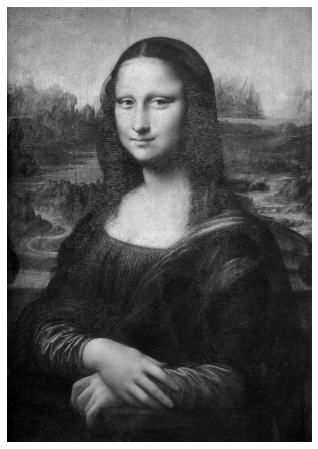

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(monaLisa, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
print(monaLisa.shape)
I = np.delete(monaLisa, slice(0,3), 0)
print(I.shape)

(1143, 800)
(1140, 800)


In [ ]:
patches = image.extract_patches_2d(I,(10,10))
print(patches.shape)

(894621, 10, 10)


In [ ]:
patches_reshaped = patches.reshape(patches.shape[0],-1)
print(patches_reshaped.shape)
print(patches_reshaped)

(894621, 100)
[[ 82  97  81 ... 112 134 116]
 [ 97  81  83 ... 134 116 122]
 [ 81  83 101 ... 116 122 118]
 ...
 [ 19  18  12 ...  15  15  19]
 [ 18  12   4 ...  15  19  24]
 [ 12   4   8 ...  19  24  28]]


In [ ]:
S = patches_reshaped
print(S.shape)
print(S)
print(S[0])

(894621, 100)
[[ 82  97  81 ... 112 134 116]
 [ 97  81  83 ... 134 116 122]
 [ 81  83 101 ... 116 122 118]
 ...
 [ 19  18  12 ...  15  15  19]
 [ 18  12   4 ...  15  19  24]
 [ 12   4   8 ...  19  24  28]]
[ 82  97  81  83 101 117  80 112 118  87  91 100  95 118  88  97 104  88
 116 106  78 105 107  96 104  93 113  62  77 116  59  90 101  85 117 111
 104  79 117  91  74  53 100 133  96 125 114 101 141  95  84  52 122  96
  92 101 123 102  77 110  99  85 104  81 116 109 126 143  89 123  89  85
  89  95 132  98 108 113  89 112 106  83  80 100 100  77 125 100 123 118
  98 102  94 113 108  90 138 112 134 116]


In [ ]:
pca = PCA()
#pca.fit(S)
W = pca.fit_transform(S)
X = pca.components_.T
print(X.shape)
print(W.shape)
S_reconstruct = np.matmul(X,W.T).T
print(S_reconstruct.shape)

(100, 100)
(894621, 100)
(894621, 100)


6479.880293721772


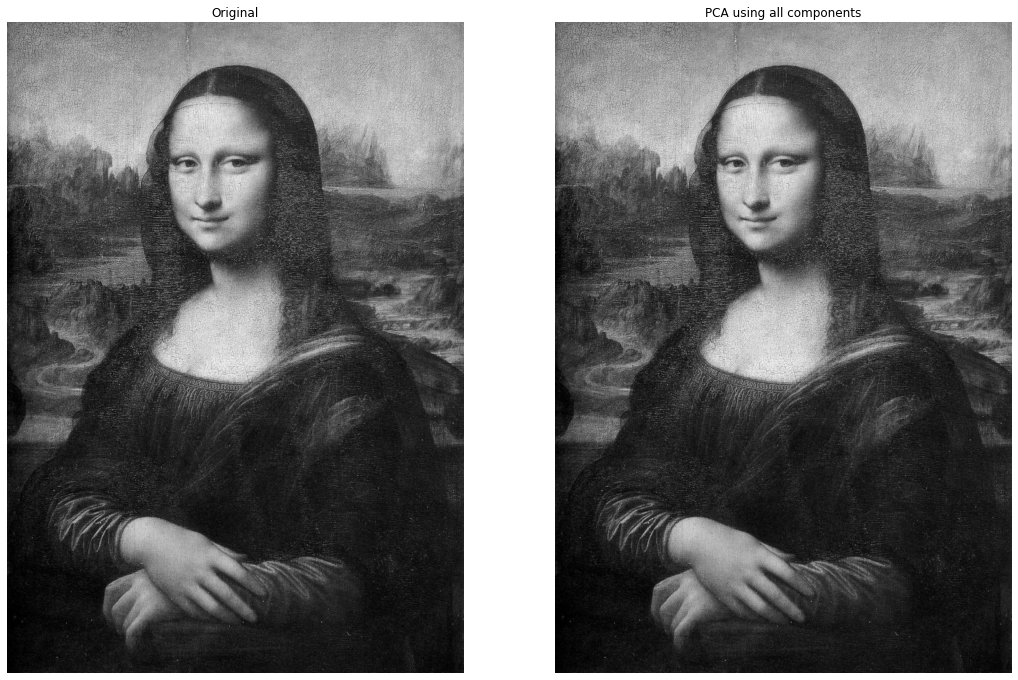

In [ ]:
img = image.reconstruct_from_patches_2d(S_reconstruct.reshape(-1, 10, 10),(1140,800))
fig, (ax1, ax2)  = plt.subplots(1,2, figsize = (18,14))
ax1.imshow(I, cmap = 'gray')
ax1.set_title('Original')
ax2.imshow(img, cmap = 'gray')
ax2.set_title('PCA using all components')
ax1.axis('off')
ax2.axis('off')
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

print(mse(I, img))


In [ ]:
sum = 0
count = 0
for eigenvalue in pca.explained_variance_ratio_:
  print(eigenvalue * 100)

  if(sum > 0.95):
    break
  sum += eigenvalue
  #print('Sum: ', sum*100)
  count += 1
print("it takes {} eigenvalues to get {}".format(count,sum))

92.01819442389996
0.9359839715419738
0.6945448130820279
0.25328090187870017
0.2138480427869792
0.16078321565900822
0.15733356536690876
0.1511664475777278
0.15039537611830783
0.14732852616806022
0.1430655193933443
0.13712775155517284
it takes 11 eigenvalues to get 0.9502592480347302


#Second to last exercise

In [ ]:
S_reconstruct_comp = np.zeros(shape = (894621, 100, 6))
print(S_reconstruct_comp.shape)

W1 = pca.fit_transform(S)
for i in range(0,6):
  X = pca.components_[i].T
  S_reconstruct_comp[:, : , i] = X * W1


(894621, 100, 6)


In [ ]:
print(S_reconstruct_comp.shape)

(894621, 100, 6)


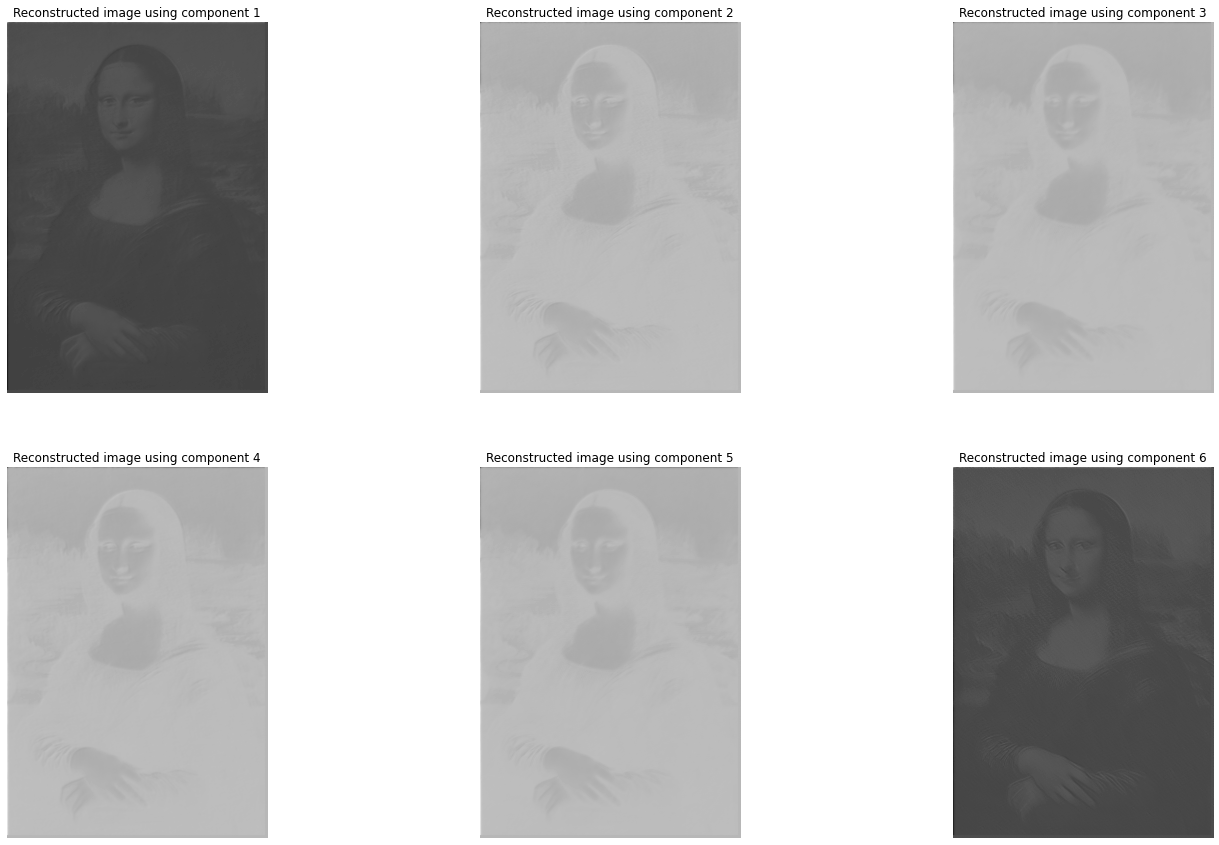

In [ ]:
fig, ax  = plt.subplots(2,3, figsize = (24,15))


for i in range(0,6):
  img = image.reconstruct_from_patches_2d(S_reconstruct_comp[:, :, i].reshape(-1, 10, 10),(1140,800))
  img = color.rgb2gray(img)
  ax[math.floor(i/3), i%3].set_title('Reconstructed image using component {}'.format(i+1))
  ax[math.floor(i/3), i%3].axis('off')
  ax[math.floor(i/3), i%3].imshow(img, cmap = 'gray')


#Last exercise

6683.758819506975


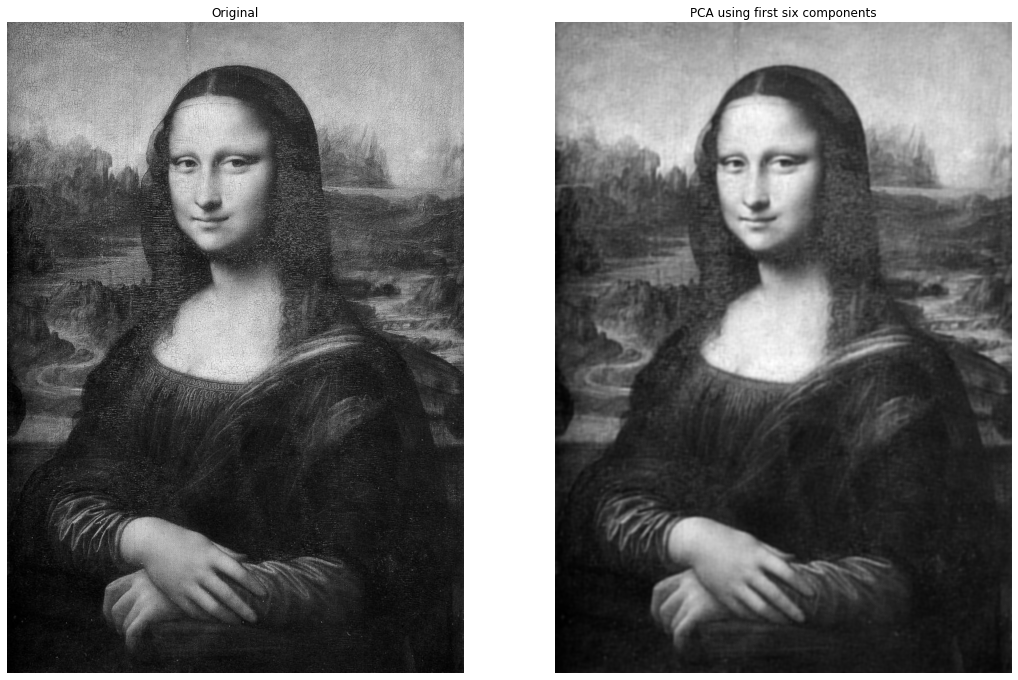

In [ ]:
pca_six = PCA(n_components=6)
W_six = pca_six.fit_transform(S)
X_six = pca_six.components_.T
S_reconstruct_six = np.matmul(X_six,W_six.T).T

img_new_six = image.reconstruct_from_patches_2d(S_reconstruct_six.reshape(-1, 10, 10),(1140,800))
fig, (ax1, ax2)  = plt.subplots(1,2, figsize = (18,14))
ax1.imshow(I, cmap = 'gray')
ax1.set_title('Original')
ax2.imshow(img_new_six, cmap = 'gray')
ax2.set_title('PCA using first six components')
ax1.axis('off')
ax2.axis('off')
print(mse(I, img_new_six))